In [1]:
from tardis import run_tardis

sim = run_tardis('my_yml.yml')

/Users/yuyizheng/opt/anaconda3/envs/tardis/lib/python3.7/importlib/_bootstrap.py:219: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)


[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:87)
[tardis.io.atom_data.util][INFO   ]  Atom Data kurucz_cd23_chianti_H_He.h5 not found in local path. Exists in TARDIS Data repo /Users/yuyizheng/Downloads/tardis-data/kurucz_cd23_chianti_H_He.h5 (util.py:35)
[py.warnings         ][WARNING]  /Users/yuyizheng/opt/anaconda3/envs/tardis/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
 (warnings.py:110)
[tardis.io.atom_data.base][INFO   ]  Read Atom Data with UUID=6f7b09e887a311e7a06b246e96350010 and MD5=864f1753714343c41f99cb065710cace. (base.py:172)
[tardis.io.atom_data.base][INFO   ]  Non provided atomic data: synpp_refs, photoionization_data (base.py:178)
[tardis.simulation.base][INFO   ]  Starting iteration 1/20 (base.py:326)
[py.warnings         ][WARNING]  /Users/yuyizheng/op

[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      14261.197956  13922.161958  1.698065  1.493030
	5       5310.133406   5379.396563  3.260926  2.570029

 (base.py:436)
[tardis.simulation.base][INFO   ]  t_inner 17221.662 K -- next t_inner 17801.281 K (base.py:439)
[tardis.simulation.base][INFO   ]  Starting iteration 8/20 (base.py:326)
[py.warnings         ][WARNING]  /Users/yuyizheng/opt/anaconda3/envs/tardis/lib/python3.7/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
 (warnings.py:110)
Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.08807e+43 erg / s Luminosity absorbed = 6.00456e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:450)
[tardis.simulation.base][INFO   ]  Plas

[py.warnings         ][WARNING]  /Users/yuyizheng/opt/anaconda3/envs/tardis/lib/python3.7/site-packages/astropy/units/equivalencies.py:124: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
 (warnings.py:110)
Running post-merge numba montecarlo (with C close lines)!
[tardis.simulation.base][INFO   ]  Luminosity emitted = 1.10579e+43 erg / s Luminosity absorbed = 6.34674e+43 erg / s Luminosity requested = 1.05928e+43 erg / s (base.py:450)
[tardis.simulation.base][INFO   ]  Iteration converged 1/4 consecutive times. (base.py:229)
[tardis.simulation.base][INFO   ]  Plasma stratification:
	              t_rad    next_t_rad         w    next_w
	Shell                                                
	0      13996.693566  14084.530311  1.725357  1.706401
	5       5514.387744   5473.685833  2.795687  2.930678

 (base.py:436)
[tardis.simulation.base][INFO   ]  t_inner 18024.091 K -- next t_inner 17640.956 K (base.py:439)
[tardis.simulation.b

Populating the interactive namespace from numpy and matplotlib
[py.warnings         ][WARNING]  /Users/yuyizheng/opt/anaconda3/envs/tardis/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['title']
`%matplotlib` prevents importing * from pylab and numpy

 (warnings.py:110)


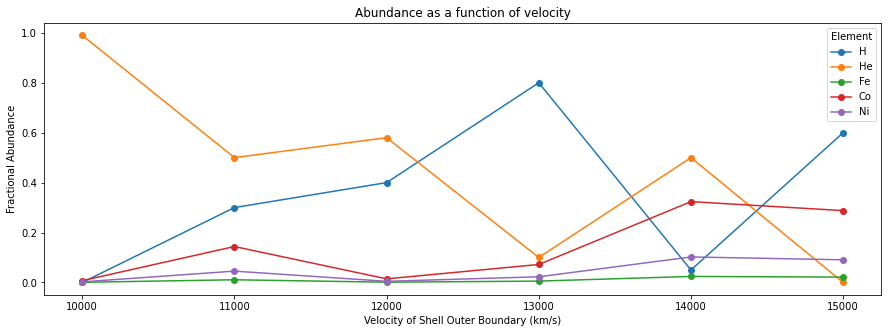

In [31]:
%pylab inline
from tardis.util.base import atomic_number2element_symbol

abundance = sim.model.abundance
abundance.columns = sim.model.velocity[1:]/100000 # inplace the columns with velocity of shell outer boundary
abundance.index = abundance.index.map(atomic_number2element_symbol) # map atomic number to element symbol

abundance.T.plot(figsize=(15, 5), title='Abundance as a function of velocity', marker='o')
ylabel('Fractional Abundance')
xlabel('Velocity of Shell Outer Boundary (km/s)')
legend(loc='best', title='Element')

In [36]:
# plot using plotly
from plotly import graph_objects as go

title = 'Fractional abundance vs velocity of different shells'

data = abundance.T

fig = go.Figure()

for col in data.columns:
    fig.add_trace(go.Line(x=data.index, y=data[col], name=data[col].name))
    
fig.update_layout(
    xaxis=dict(
        title='Velocity of Shell Outer Boundary (km/s)',
        exponentformat="none",
        ),
    yaxis=dict(title='Fractional Abundance', exponentformat="e"),
    height=500,
    title=title
    )

fig.show()